# Basic scVI Tutorial

In [3]:
!pwd

/home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here


In [78]:
#!pip install nvidia-ml-py3

  Stored in directory: /home/alaridl/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
Successfully built nvidia-ml-py3


## Instantiate Base Settings, Loading Cortex Dataset

In [ ]:
#!pip install numpy
import os
import numpy as np
print("First set the root path for the project!")
root_path = os.getcwd()
child_path = os.path.join(root_path,'data')
n_epochs_all = None
show_plot = True

def savePickle(data, picklefile):
    """

    :param data: Data to be saved
    :param picklefile: Filename for output Pickle file, should have .pickle ending
    """
    import pickle
    with open(picklefile, "wb") as f:
        pickle.dump(data, f)
    f.close()
def loadPickle(picklefile):
    import pickle
    with open(picklefile, "rb") as f:
        data = pickle.load(f)
    f.close()
    return data

cortex_loc = os.path.join(child_path,'cortex_24may.pickle')
cortex_dataset = loadPickle(picklefile = cortex_loc)
pbmc_loc = os.path.join(child_path,'pbmc_24may.pickle')
pbmc_dataset = loadPickle(picklefile = pbmc_loc)

In [78]:
cortex_dataset.__dict__

{'save_path': '/home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data',
 'download_name': 'expression.bin',
 'url': 'https://storage.googleapis.com/linnarsson-lab-www-blobs/blobs/cortex/expression_mRNA_17-Aug-2014.txt',
 'genes_fish': [],
 'genes_to_keep': [],
 'additional_genes': 558,
 'precise_labels': array([0, 0, 0, ..., 8, 8, 8]),
 'dense': True,
 '_X': array([[ 28.,  22., 116., ...,   6.,  14.,   3.],
        [ 41.,  18.,  12., ...,   9.,   7.,   8.],
        [ 57.,  26.,  46., ...,   7.,  13.,   9.],
        ...,
        [  1.,   0.,   0., ...,   1.,   0.,   0.],
        [  1.,   1.,   0., ...,   1.,   0.,   1.],
        [  0.,   0.,   0., ...,   3.,   1.,   0.]], dtype=float32),
 'nb_genes': 558,
 'local_means': array([[8.455475],
        [8.455475],
        [8.455475],
        ...,
        [8.455475],
        [8.455475],
        [8.455475]], dtype=float32),
 'local_vars': array([[0.44135004],
        [0.44135004],
        [0.44135004],
        .

## Other Datasets

In [38]:

pbmc_loc = os.path.join(child_path,'pbmc_24may.pickle')
#pbmc_dataset = loadPickle(picklefile = pbmc_loc)

from scvi.dataset import PbmcDataset
pbmc_dataset = PbmcDataset(save_path=child_path) 
savePickle(data=pbmc_dataset,picklefile = pbmc_loc)

#pbmc_dataset = loadPickle(picklefile = pbmc_loc)



File /home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data/gene_info_pbmc.csv already downloaded
File /home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data/pbmc_metadata.pickle already downloaded
File /home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data/10X/pbmc8k/filtered_gene_bc_matrices.tar.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
File /home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data/10X/pbmc4k/filtered_gene_bc_matrices.tar.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
Keeping 33694 genes
Downsampling from 12721 to 11990 cells
Downsampling from 33694 to 3346 genes
Downsampling from 11990 to 11990 cells


In [39]:
pbmc_dataset.__dict__

{'save_path': '/home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data',
 'urls': ['https://github.com/YosefLab/scVI-data/raw/master/gene_info.csv',
  'https://github.com/YosefLab/scVI-data/raw/master/pbmc_metadata.pickle'],
 'download_names': ['gene_info_pbmc.csv', 'pbmc_metadata.pickle'],
 'de_metadata':       Unnamed: 0             ENSG        GS  CD_logFC  CD_AveExpr      CD_t  \
 0              5  ENSG00000188976     NOC2L  0.248976    4.193230  1.308282   
 1              7  ENSG00000187608     ISG15 -0.036463    5.769094 -0.216990   
 2             36  ENSG00000149527     PLCH2  0.505600    3.225463  1.834575   
 3             37  ENSG00000157881     PANK4 -0.093142    4.319701 -0.772409   
 4             40  ENSG00000157873  TNFRSF14  0.073292    4.949553  0.353608   
 5             44  ENSG00000130764    LRRC47  0.195746    5.595843  1.374298   
 6             46  ENSG00000198912  C1orf174  0.491782    4.741658  3.127764   
 7             52  ENS

In [ ]:
pbmc_total = find_arr_element_count(arr=pbmc_dataset._X.toarray())

zero_rate_pbmc = np.round(100*np.divide(pbmc_total - np.count_nonzero(pbmc_dataset._X.toarray()),pbmc_total),2)
zero_rate_pbmc

In [ ]:
# Count amount of 0 elements for comparison
def find_arr_element_count(arr):
    return arr.shape[0]*arr.shape[1]
pbmc_total = find_arr_element_count(arr=pbmc_dataset._X)
cortex_total = find_arr_element_count(arr=cortex_dataset._X)
zero_rate_pbmc = np.round(100*np.divide(pbmc_total - np.count_nonzero(pbmc_dataset._X),pbmc_total),2)
zero_rate_cortex = np.round(100*np.divide(cortex_total - np.count_nonzero(cortex_dataset._X),cortex_total),2)
print(f"Percentage of 0 elements in PBMC Gene Expression matrix is {zero_rate_pbmc}")
print(f"Percentage of 0 elements in Mouse Cortex Gene Expression matrix is {zero_rate_cortex}")

In [30]:
#(cortex_total-np.count_nonzero(cortex_dataset._X))/cortex_total

cortex_dataset.__dict__

{'save_path': '/home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data',
 'download_name': 'expression.bin',
 'url': 'https://storage.googleapis.com/linnarsson-lab-www-blobs/blobs/cortex/expression_mRNA_17-Aug-2014.txt',
 'genes_fish': [],
 'genes_to_keep': [],
 'additional_genes': 558,
 'precise_labels': array([0, 0, 0, ..., 8, 8, 8]),
 'dense': True,
 '_X': array([[ 28.,  22., 116., ...,   6.,  14.,   3.],
        [ 41.,  18.,  12., ...,   9.,   7.,   8.],
        [ 57.,  26.,  46., ...,   7.,  13.,   9.],
        ...,
        [  1.,   0.,   0., ...,   1.,   0.,   0.],
        [  1.,   1.,   0., ...,   1.,   0.,   1.],
        [  0.,   0.,   0., ...,   3.,   1.,   0.]], dtype=float32),
 'nb_genes': 558,
 'local_means': array([[8.455475],
        [8.455475],
        [8.455475],
        ...,
        [8.455475],
        [8.455475],
        [8.455475]], dtype=float32),
 'local_vars': array([[0.44135004],
        [0.44135004],
        [0.44135004],
        .

In [3]:
one = np.count_nonzero(pbmc_dataset.X)

In [4]:
from scvi.dataset import CortexDataset
cortex_dataset = CortexDataset(save_path = child_path)

print(pbmc_dataset) 
#This dataset that includes 8,617 cord blood mononuclear cells profiled using 10x along with for each cell 13 
#well-characterized mononuclear antibodies. We kept the top 600 genes by variance.
from scvi.dataset.cite_seq import CbmcDataset
cbmc_gene_dataset = CbmcDataset()
cbmc_loc = os.path.join(child_path,'cbmc_24may.pickle')
#savePickle(data=cbmc_gene_dataset,picklefile = cbmc_loc)



Preprocessing Cortex data
Finished preprocessing Cortex data


## Naming Variables in Mouse Cortex Dataset
The Mouse Cortex Cells dataset contains 3005 mouse cortex cells and gold-standard labels for seven distinct cell types. Each cell type corresponds to a cluster to recover. We retain top 558 genes ordered by variance.
**cortex_dataset.__dict__**

In [64]:
X = cortex_dataset._X
precise_labels = cortex_dataset.precise_labels
Y = cortex_dataset.labels[:,0]
#print(f"type of X is {type(X)}")
#print(f"type of prec labels is {type(precise_labels)}")
#print(f"type of labels is {type(labels)}")
#test = X[:, :-1]
#testlab = X[:, -1]
print(f"Labels shape is {Y.shape}")
print(f"X shape is {X.shape}")
print(f"Amount of unique labels is {len(np.unique(Y))} that are then {cortex_dataset.cell_types}")

Labels shape is (3005,)
X shape is (3005, 558)
Amount of unique labels is 7 that are then ['astrocytes_ependymal' 'endothelial-mural' 'interneurons' 'microglia'
 'oligodendrocytes' 'pyramidal CA1' 'pyramidal SS']


**So this means we have 3005 mouse cells of 7 different populations, containing 558 different genes, ordered by variance**

In [79]:
# CELLS IN ROWS, GENES IN COLUMNS
#cbmc_gene_dataset.__dict__
#cortex_dataset.__dict__
#cortex_dataset.X

# Neural Networks and Machine Learning Recap
## Machine Learning Recap

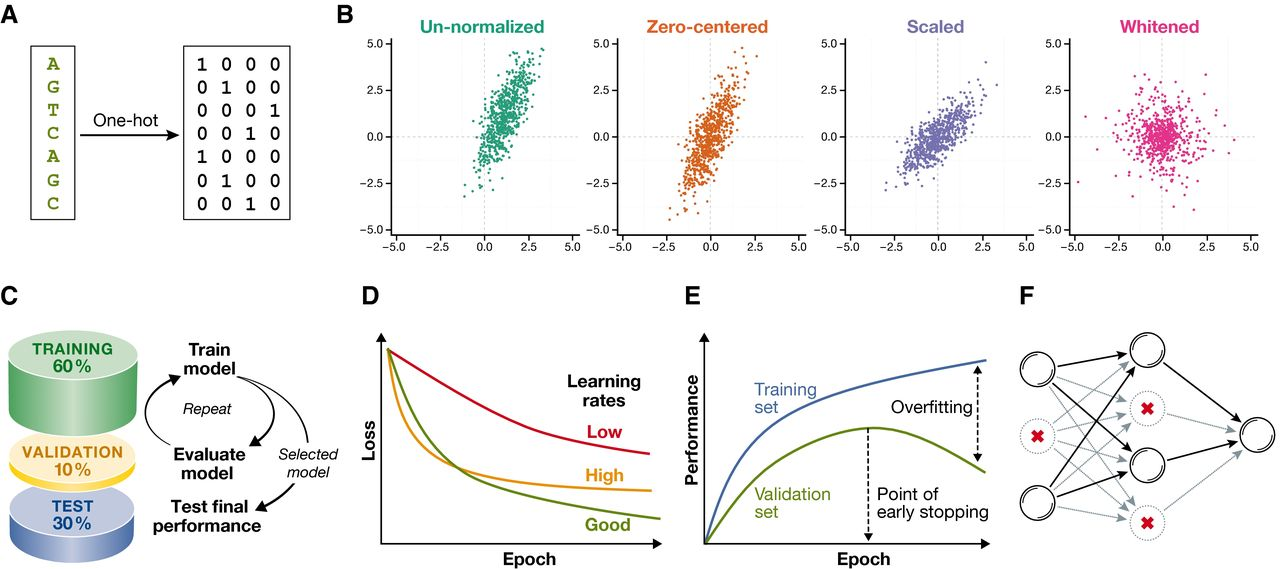

In [106]:
Image(filename="./img/nn_all_combined_image.jpg")

*"(A) The classical machine learning workflow can be broken down into four steps: data pre‐processing, feature extraction, model learning and model evaluation. (B) Supervised machine learning methods relate input features x to an output label y, whereas unsupervised method learns factors about x without observed labels. (C) Raw input data are often high‐dimensional and related to the corresponding label in a complicated way, which is challenging for many classical machine learning algorithms (left plot). Alternatively, higher‐level features extracted using a deep model may be able to better discriminate between classes (right plot). (D) Deep networks use a hierarchical structure to learn increasingly abstract feature representations from the raw data."*

[Image reference: Deep Learning for Computational Biology](http://msb.embopress.org/content/12/7/878)

So in the general pipeline of a machine learning model, say we have a classification model where we wish to make some kind of a decision. If we have string features, say nucleotides AGT etc, then these features should be converted into unit vectors using one-hot encoding. In addition, one might have numerical or continuous features, in which case polymonial features may be added --- this all constitutes **feature engineering**, that in principle can be somewhat automated nowadays using libraries such as [Featuretools](https://www.featuretools.com/).

In addition to that, the data is often normalized (centered and scaled so that it is in the range of -1 to 1 or 0 to 1). 

Before training the model, it is important to split the whole dataset randomly into smaller parts that are then handeled differently: In case of using a validation set, data is trained on a training set and then the best model is chosen according to the minimal error on a validation set. If K-fold leave-one-out cross-validation dataset is used, then the data is split randomly into K segments or buckets, and at each step the algorithm is trained on K-1 segments and error rate is obtained for the K'th segment; after obtaining all the errors, cross-validation error is defined as the average of the K errors.



## Neural Networks
Neural Networks are just one type of a machine learning model, but as we have seen from [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem), a very powerful one. Given a feasible task, the right learning algorithm and network topology, error tolerance $\varepsilon$ and a process collecting the data, a neural network can most probably solve this problem, and in many cases better than humans. Nowadays neural networks have even started to [substitute software](https://medium.com/@karpathy/software-2-0-a64152b37c35) and entire startups are literally built on top of neural networks, so it is not only a "Google" or "Amazon thing".


### WHere Neural Networks work well and how they related to different subfields of machine learning
Neural networks work well for continuous data. A neural network is especially good with matrices, thus it can solve any problems that can be posed in matrix (2D-tensor) format much better than a human brain could.
Although the data is continuous in the sense that for example in an image, the nearby pixel values are usually highly correlated to each other, it is still usually high-dimensional and kind of abstract. The idea of machine learning often starts with reducing the dimensionality of the original dataset. 
If the process of dimensionality reduction is the only operation in the sense that no decision or label is output, it is called **unsupervised learning** or **clustering**. On the other hand, if the dimensionality reduction has some clear target variable or label that has to be achieved, this process would be **supervised learning**.

**Deep Learning** Is a branch of machine learning where deep (having more than 1 hidden layer) neural networks are trained (optimized) to achieve certain behaviour. Deep Learning is related to unsupervised learning in a way that deep neural networks for supervised learning implement dimensionality reduction usually in the first layers (e.g. edge detection or contour detection) or the deep network could have a sole purpose of learning the distribution of input data (reduction) in order to re-generate samples from this distribution, as happens in the case of [generative adversarial network](https://en.wikipedia.org/wiki/Generative_adversarial_network) and [variational autoencoder](
https://en.wikipedia.org/wiki/Autoencoder#Variational_autoencoder_.28VAE.29)

### Homework 2 : 

1) Write in detail how this following implementation of your own custom Neural Network class in Pytorch relates to the concepts you have learned in the OOP Module of the course.

2) Explain how the backward method in the module implements the [backpropagation algorithm](https://en.wikipedia.org/wiki/Backpropagation) that is the most common way of training neural networks

Remember that in module 1 you implemented gradiant descent in the form of simplest neural network in Pytorch. 

Now your task is to review the following code, adopted from
[Pytorch example](https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0)
and compare this to the syntax learned in Module 1.
WRite down differences and similarities

In [ ]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 3 X 2 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))

## Autoencoders
Autoencoders learn a “compressed representation” of input (could be image,text sequence etc.) automatically by first compressing the input (encoder) and decompressing it back (decoder) to match the original input. The learning is aided by using distance function that quantifies the information loss that occurs from the lossy compression. So learning in an autoencoder is a form of unsupervised learning (or self-supervised as some refer to it) - there is no labeled data.

In [52]:
import os
os.getcwd()

'/home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here'

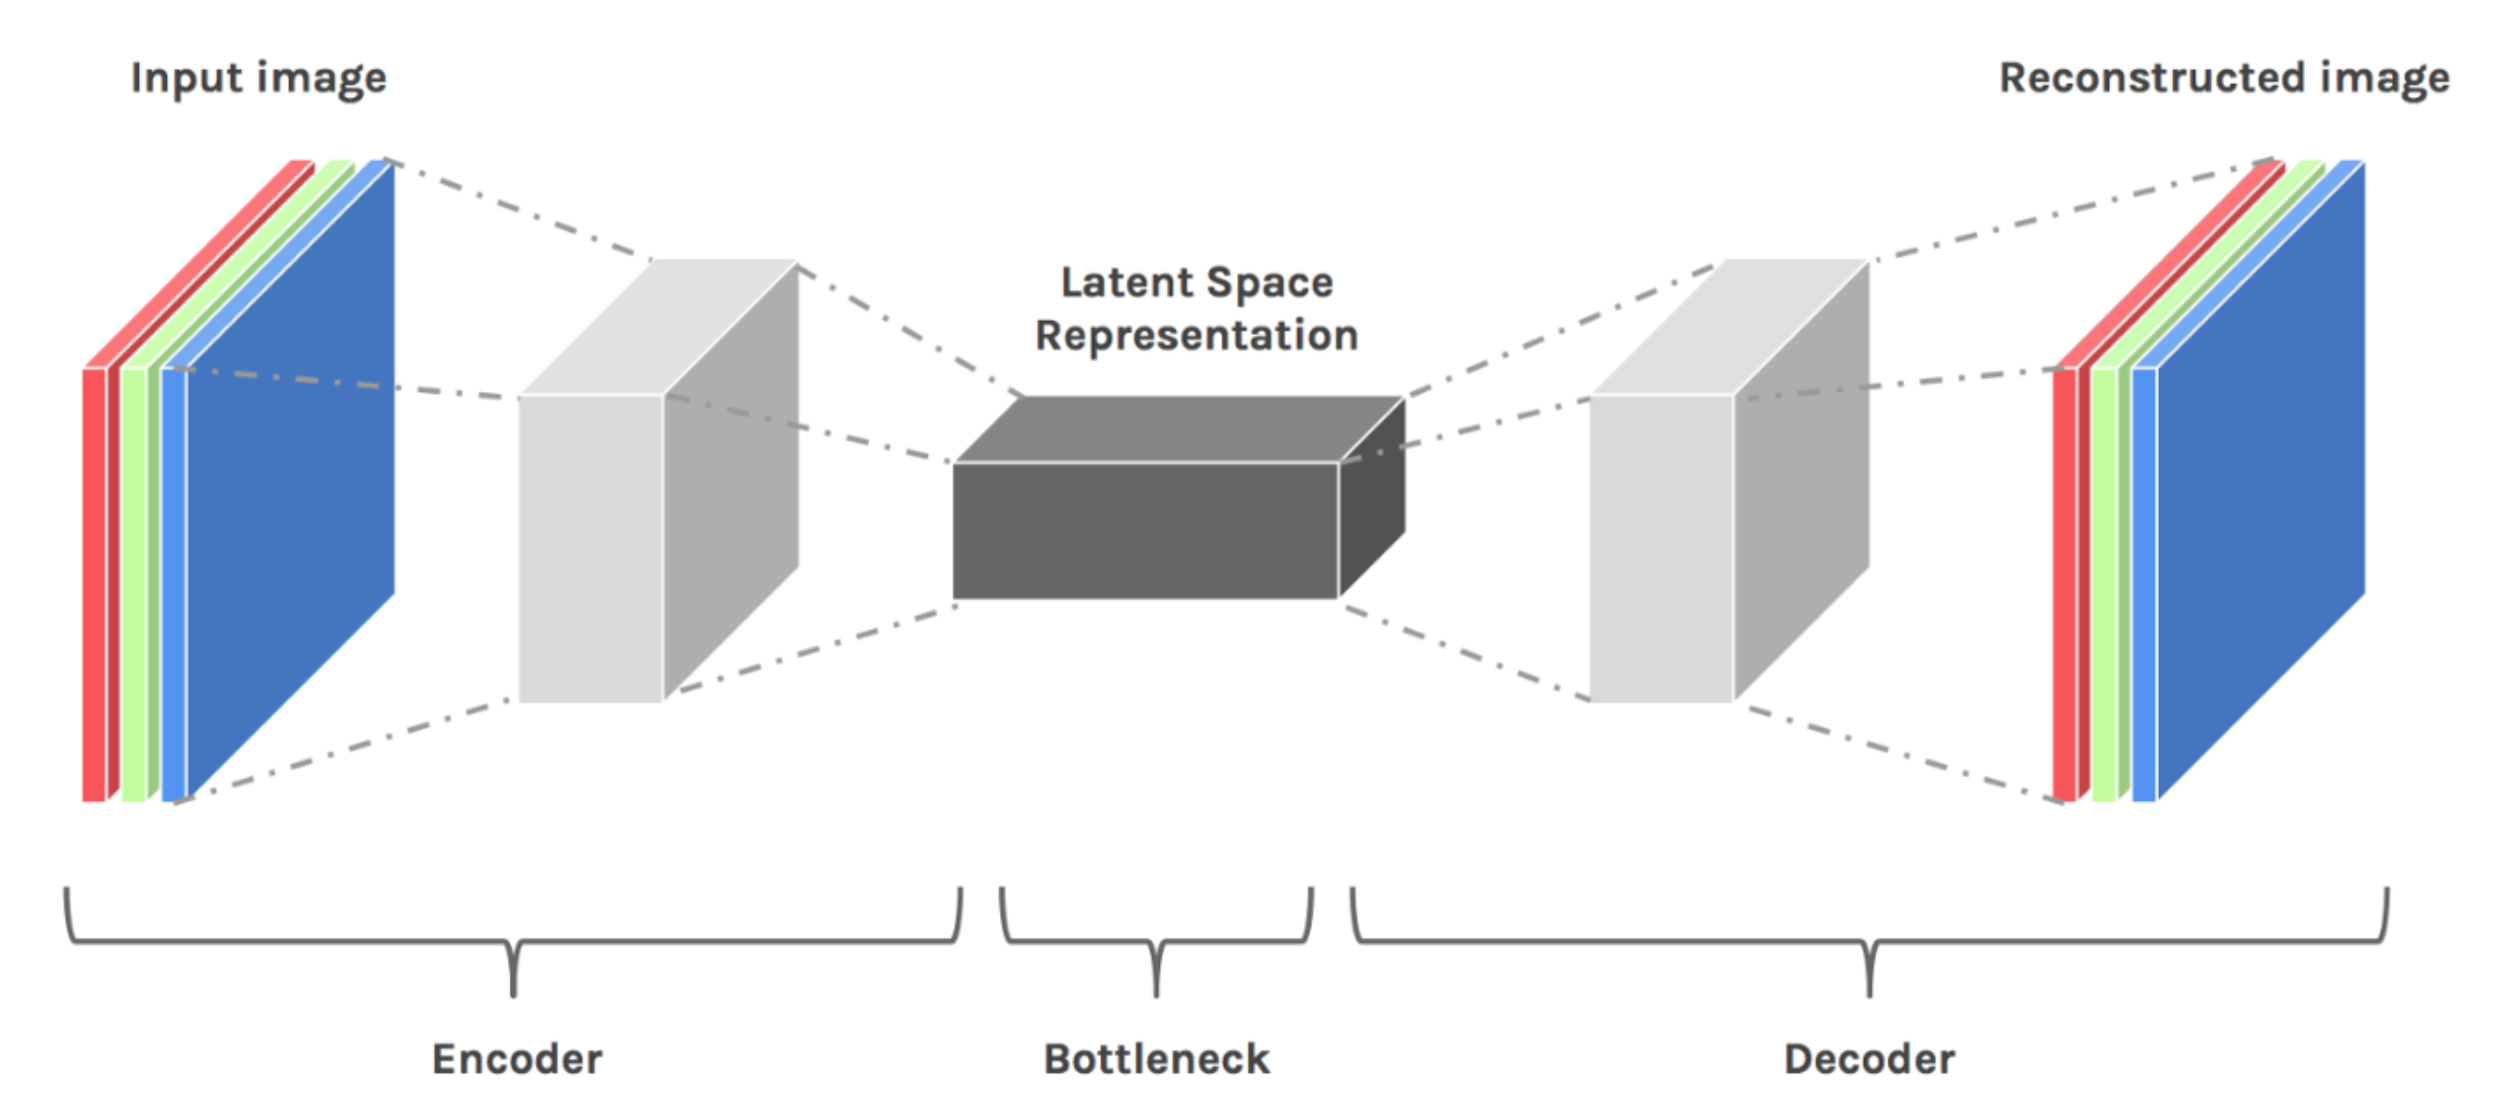

In [107]:
from IPython.display import Image

Image(filename="./img/autoencoder_structure.PNG")
# Reference: https://cdn-images-1.medium.com/max/2400/1*8ixTe1VHLsmKB3AquWdxpQ.png

Looking at the image above, you might wonder what is going on. There are sequences of blocks and connections between them.
In this case, an autoencoder takes in an image, applies 2 consecutive transformations to it, to reduce the dimensionality in the image.
This sequence of transformations from input to latent space representation form an **encoder** and the process itself is called encoding.
Afterwards, the transformations that reconstruct the original image from the latent space representation, form a **decoder**.


### Why would somebody want to build such a structure?

 In most  problems such as regression or classification, a neural network takes an image (dense matrix or tensor) and using certain operations reduces the dimensionality of it, reaching some sort of a decision by the final layer. 
Now one can use this final layer also as an intermediary layer, to regenerate the initial input data back. In this way, the network can learn a probabilistic representation of the data on a manifold of smaller dimension than the original input data -- one might say we have unconvered an lower dimensional embedding structure in a higher dimensional space. 
To read more about this topic, refer to this [article](https://openreview.net/pdf?id=BJ3filKll)

# Homeworks 2

## What is t-SNE and what is it used for? Refer to [Github repo](https://lvdmaaten.github.io/tsne)
### Q1. What are the three main stages of TSNE?
### Q2. Where is t-SNE used?
### Q3. What effect does varying the perplexity parameter have?
### Q4. What effect does varying the gain parameter have?
### Q5. What effect does varying the learning rate parameter $\eta$ have?

## Solution

In [ ]:
import pylab

def load_data(path):
    # load in the data 
    # data = 
    nsamples,featlength = data.shape # number of samples and number of features
    #features = data.iloc[] whatever
    initialdim = features.shape[1] # no of features. This is equal to the initial dimension of the feature space
    return features, initialdim

features,initialdim = load_data(path)

perplexities = np.array([10,20,30]) # main parameter of tSNE
etas = np.array([100,200,500]) # sort of a learning rate parameter for the output of tSNE
min_gains = np.array([0.01,0.1,1]) # gain parameter for tSNE



# Computing the tSNE embedding into 2 dimensions, varying perplexity          
tsne_per = list()
for idx,per in enumerate(perplexities):
     out = tsne(X=features,no_dims=2,initial_dims=initialdim,perplexity=per)
     tsne_per.append(out)
    
# Computing the tSNE embedding into 2 dimensions, varying eta          

tsne_eta = list()

for idx,eta in enumerate(etas):
     out = tsne(X=features,no_dims=2,initial_dims=initialdim,perplexity=20,eta=eta)
     tsne_eta.append(out)

# Computing the tSNE embedding into 2 dimensions, varying minimum gain          

tsne_gains = list()

for idx,gain in enumerate(min_gains):
     out = tsne(X=features,no_dims=2,initial_dims=initialdim,perplexity=20,min_gain=gain)
     tsne_gains.append(out)

# Plotting label as a function of perplexity
for i in range(0,len(tsne_per)): # changing perplexity parameter (the log of it is used in tSNE)
    pylab.figure()
    pylab.scatter(tsne_per[i][:,0], tsne_per[i][:,1],20,label) 
    pylab.title(perplexities[i])

# Plotting label as a function of minimum gain

  
for i in range(0,len(tsne_gains)):
    pylab.figure()
    pylab.scatter(tsne_gains[i][:,0], tsne_gains[i][:,1],20,label)
    pylab.title(min_gains[i])
    

# Plotting label as a function of eta

    
for i in range(0,len(tsne_eta)):
    pylab.figure()
    pylab.scatter(tsne_eta[i][:,0], tsne_eta[i][:,1],20,label)
    pylab.title(etas[i])


Use your own dataset and compile the plots. 

**Answers and plots to homework questions**
 [here](https://my.pcloud.com/publink/show?code=XZf08A7Z6p9xoS6nd27YbwS31GG0GSocN8Ry)

b## Home Exercise on Dimensionality Reduction, setup:

Since 
Use this exercise on both datasets and compare the results. The solutions are given for the Cortex dataset.
**Fit a deep neural autoencoder on the Cortex dataset.**


 **Important : Usually in machine learning, before training supervised models, the data is split into training and validation data and given the performance on those, labels are predicted for the testing data, for which one has no labels stored.In this case, we use all the data for training and the testing is happening internally at model fitting time. We do this because we don't need to predict labels for new data, but just to understand the existing data**
 
  Instructions : 
 * When running any chunks for a model, always start the cell with `%timeit` magic command. This measures the cell execution time that you can afterwards compare to each other
 * First Log Transform the data in a a way that makes the output to be non-negative. Note : For that, we also need to do a horizontal shift in the coordinate frame. Consider the impact of $x-\alpha$ VS $x+\alpha$ -- which one should you choose and what value for $\alpha$ ?
 * Pick a natural number n_input that corresponds to the amount of principal components used as an input to the autoencoder. Choose n=60 to get started.
 * Run the PCA algorithm on the and after that, use MinMaxScaler to scale the data between 0 and 1.
 * Pick a natural number n > 0
 * Import Sequential and Model classes from keras.models
 * Create a Autoencoder Network structure.

    If you wish the autoencoder to 2n+1 layers, then
     for a sequential model, add n dense layers, a linear layer, and n more dense layers.
     
     * Pick such an activation function that the network doesn't sustain dead neurons. Use A dead neuron is a neuron which doesn't activate at all and is improbable to do so.
     * Name the (n+1)-th layer `latent_rep` and make sure that the last layer has sigmoidal activations because then it conforms to the input data range. Make sure that the central layer has only 2 hidden units so that we could plot the activations of those neurons later.
     * Compile and fit the model, use Adam Optimizer, make sure `shuffle`=True, choose `batch_size`=128 and epochs according to your hardware in use. If you need a free GPU for fitting, use [Google Colaboratory](https://colab.research.google.com/)
     The data is always log-transformed before using in any algorithm.
* Do a 4-plot comparison:
    * 1st plot quantifies the cell types in the 2D-space of the 2 most variance capturing principal components
    * 2nd plot quantifies the cell types in the 2D-TSNE space over PCA of log-transformed data
    * 3rd plot quantifies the cell types in the 2D space of the `latent_rep` aforementioned trained autoencoder hidden neuron activations over the PCA reduced log transformed input data
    * 4th plot quantifies the cell types in the 2D space of TSNE  over the aforementioned a `latent_rep` activations of the autoencoder
    * 5th plot quantifies the cell types in the 2D space of autoencoder  `latent_rep` activations without TSNE
     *6th plot quantifies the cell types in the 2D space of TSNE
    
    
 * Which combination do you think worked the best in separating out the different cell populations?
 * WHat did you notice about the running times of the algorithms -- comparing fitting the autoencoder VS fitting the TSNE model?
 * The output images in the solution have a scaling problem -- try to fix it!

## SOLUTION
## Performing Linear Dimensionality Reduction with PCA

In [65]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

X = np.log(X+1) #define X as positive
x_minmax = MinMaxScaler().fit_transform(X)

n_input = 60 # retain 60 input components
x_train_pca = PCA(n_components = n_input).fit_transform(X)
y_train = Y # fit the X-data principal components
x_train_pca_minmax = MinMaxScaler().fit_transform(x_train_pca)



## Training a Deep Autoencoder in Keras

In [68]:

## Solution : Model
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.decomposition import PCA
from keras.models import Sequential, Model
import nvidia_smi

# REDUCE DIMENSIONS WITH DEEP AUTOENCODER

#nvidia_smi.nvmlInit()
#handle = nvidia_smi.nvmlDeviceGetHandleByIndex(0)
#res = nvidia_smi.nvmlDeviceGetUtilizationRates(handle)
#print(f'gpu: {res.gpu}%, gpu-mem: {res.memory}%')


###########3 before training, run watch -n 1 nvidia-smi in Terminal #############

# there is no inherent need for symmetry inside an autoencoder as it used to be in the early days.
# For more information, refer to https://datascience.stackexchange.com/questions/23739/why-are-autoencoders-for-dimension-reduction-symmetrical
# ELU is used to avoid dead neurons in the network. Refer to https://medium.com/tinymind/a-practical-guide-to-relu-b83ca804f1f7
def define_and_fit_deep_autoencoder(data,n_input):
    model = Sequential()
    model.add(Dense(18,      activation='elu',     kernel_initializer='he_uniform', 
                    input_shape=(n_input,)))
    
    model.add(Dense(15,      activation='elu',     kernel_initializer='he_uniform'))
   
    model.add(Dense(11,      activation='elu',     kernel_initializer='he_uniform'))
   
    model.add(Dense(4,       activation='elu',     kernel_initializer='he_uniform'))
   
    model.add(Dense(2,       activation='linear',  kernel_initializer='he_uniform', 
                    name="latent_rep"))
   
   
    model.add(Dense(8,       activation='elu',     kernel_initializer='he_uniform'))
    
    model.add(Dense(13,      activation='elu',     kernel_initializer='he_uniform'))
    
    model.add(Dense(18,      activation='elu',     kernel_initializer='he_uniform'))
    model.add(Dense(n_input, activation='sigmoid'))
    model.compile(loss = 'mean_squared_error', optimizer = Adam(lr = 0.0001))
    #model.summary()
    history = model.fit(data, data, batch_size = 128, epochs = 500, shuffle= True,verbose = 0)
    return model,history




Training Loss over PCA data:  0.019078225860629423


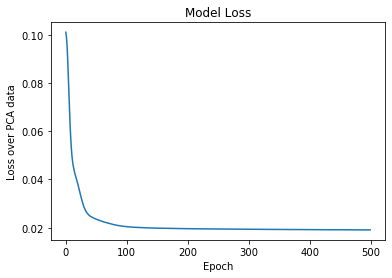

In [71]:
%timeit
deep_autoencoder_pca,training_history_pca = define_and_fit_deep_autoencoder(data=x_train_pca_minmax,n_input=60)
print("\n" + "Training Loss over PCA data: ", training_history.history['loss'][-1])
plt.plot(training_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss over PCA data')
plt.xlabel('Epoch')
plt.show()


Training Loss over ful  data:  0.019078225860629423


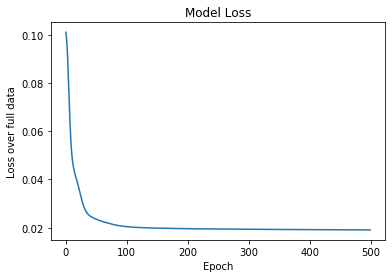

In [70]:
%timeit
deep_autoencoder,training_history = define_and_fit_deep_autoencoder(data=x_minmax,n_input=558)
print("\n" + "Training Loss over ful  data: ", training_history.history['loss'][-1])
plt.plot(training_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss over full data')
plt.xlabel('Epoch')
plt.show()

**We are interested in the layer where we have reduce the dimensionality to 2, 
meaning that we have only 2 nodes encoding the different cell distributions, thus we can plot this in 2-D**
Next we will take the 50 principal components and get the reduction to only 2 dimensions

In [72]:
from keras.models import Model
encoder_pca = Model(deep_autoencoder_pca.input, deep_autoencoder_pca.get_layer('latent_rep').output)
encoder = Model(deep_autoencoder.input, deep_autoencoder.get_layer('latent_rep').output)

reduced_pca_to_autoencoder_encoder_activations = encoder_pca.predict(x_train_pca_minmax)
autoencoder_encoder_activations = encoder.predict(x_minmax)

**We expect that although we log-transformed the data to have multinormal distribution, PCA as linear dimensionality reduction wouldn't separate the cell populations well enough, thus we are going to furthermore separate the clusters using TSNE**

## Performing Non-Linear DImensionality REduction with TSNE over Autoencoder and PCA

In [75]:
%timeit
from sklearn.manifold import TSNE
model_tsne_auto = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
                       perplexity = 90, n_iter = 1000, verbose = 1)
model_tsne_pca = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
                       perplexity = 90, n_iter = 1000, verbose = 1)


tsne_on_autoencoder_activations = model_tsne_auto.fit_transform(reduced_pca_to_autoencoder_encoder_activations)
tsne_on_pca = model_tsne_pca.fit_transform(x_train_pca_minmax)

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 3005 samples in 0.001s...
[t-SNE] Computed neighbors for 3005 samples in 0.134s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3005
[t-SNE] Computed conditional probabilities for sample 2000 / 3005
[t-SNE] Computed conditional probabilities for sample 3000 / 3005
[t-SNE] Computed conditional probabilities for sample 3005 / 3005
[t-SNE] Mean sigma: 0.059050
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.442844
[t-SNE] Error after 1000 iterations: 0.421020
[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 3005 samples in 0.003s...
[t-SNE] Computed neighbors for 3005 samples in 0.990s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3005
[t-SNE] Computed conditional probabilities for sample 2000 / 3005
[t-SNE] Computed conditional probabilities for sample 3000 / 3005
[t-SNE] Computed conditional probabilities for sample 3005 / 3005
[t-SNE] Mean sigma: 0.356187
[t-SNE

In [96]:
model_tsne_pure = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
                       perplexity = 90, n_iter = 1000, verbose = 1)
tsne_pure = model_tsne_pca.fit_transform(x_minmax)

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 3005 samples in 0.043s...
[t-SNE] Computed neighbors for 3005 samples in 7.794s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3005
[t-SNE] Computed conditional probabilities for sample 2000 / 3005
[t-SNE] Computed conditional probabilities for sample 3000 / 3005
[t-SNE] Computed conditional probabilities for sample 3005 / 3005
[t-SNE] Mean sigma: 1.256200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.421974
[t-SNE] Error after 1000 iterations: 0.840006


##  Comparing the Dimensionality Reduction Techniques Visually

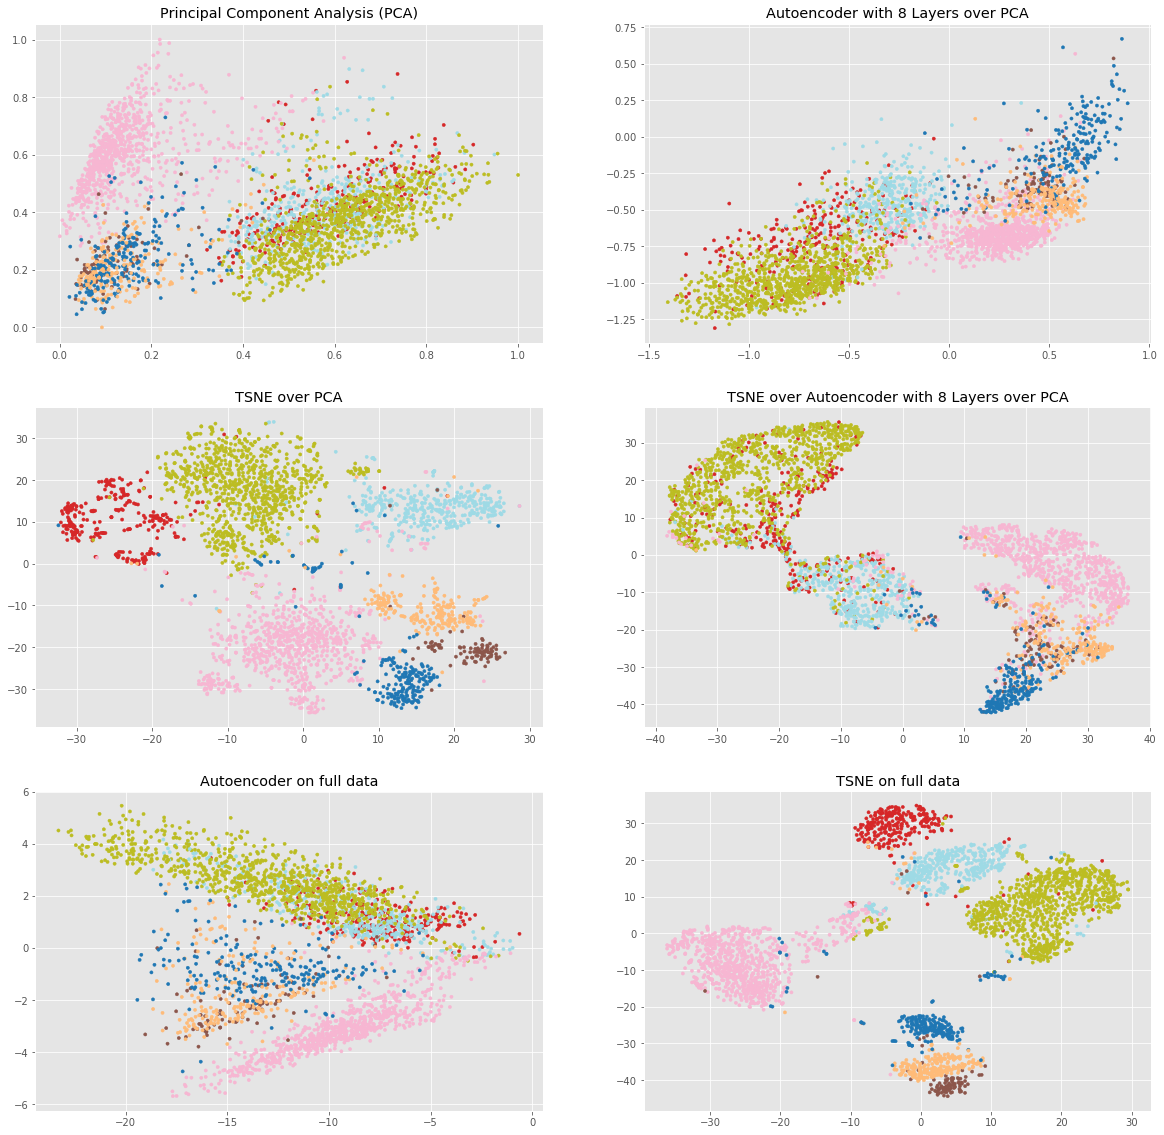

In [98]:
%matplotlib inline
import pandas as pd

plt.style.use('ggplot')

di = dict(zip(range(0,8),cortex_dataset.cell_types))

data = pd.DataFrame(cortex_dataset.cell_types,index=range(0,7))
#plt.figure(figsize=(20,10))

def draw_plots(col="Pastel1"):
    # try different colormaps
    fig, axs = plt.subplots(3,2,figsize=(20, 20))
    axs[0, 0].scatter(x_train_pca_minmax[:, 0], x_train_pca_minmax[:, 1], c = y_train, 
                      cmap = col, s = 10)
    axs[0, 0].set_title('Principal Component Analysis (PCA)')

    axs[0, 1].scatter(reduced_pca_to_autoencoder_encoder_activations[:, 0], 
                      reduced_pca_to_autoencoder_encoder_activations[:, 1], c = y_train, 
                      cmap = col, s = 10)
    axs[0, 1].set_title('Autoencoder with 8 Layers over PCA')

    axs[1, 0].scatter(tsne_on_pca[:, 0], tsne_on_pca[:, 1], c = y_train, cmap = col, s = 10)
    axs[1, 0].set_title('TSNE over PCA')

    axs[1, 1].scatter(tsne_on_autoencoder_activations[:, 0], tsne_on_autoencoder_activations[:, 1],
                      c = y_train, cmap = col, s = 10)
    axs[1, 1].set_title('TSNE over Autoencoder with 8 Layers over PCA')
    
    axs[2, 0].scatter(autoencoder_encoder_activations[:, 0], autoencoder_encoder_activations[:, 1], c = y_train, 
                      cmap = col, s = 10)
    axs[2, 0].set_title('Autoencoder on full data')
    
    axs[2,1].scatter(tsne_pure[:, 0], tsne_pure[:, 1], c = y_train, 
                      cmap = col, s = 10)
    axs[2, 1].set_title('TSNE on full data')

    #plt.legend((tuple(cortex_dataset.cell_types)))
    plt.show()

draw_plots(col="tab20")
#print("Color map is the following: ")
#print(data)

## Summary of the Results

We can see that PCA and autoencoder alone don't separate the cell clusters out very well, irrespective when we use PCA or not. Still, autoencoder does it better than PCA. You can see it for example by comparing the overlap of blue and orange clusters in the PCA case -- these are much better separated in the autoencoder case.

We can see a property of TSNE emerging on the images, namely that TSNE applied on any data can learn the data to be more compact. Agreed? Compare to the answers given in the t-SNE homework!

If you were running the cells on your GPU, you might have noticed that the Sklearn implementation of TSNE required considerably longer time than training a Keras 8-layer autoencoder, for example. This may because the default Sklearn implementation of TSNE cannot utilize GPU when fitting the model.
Conclusion : If you wan't to use TSNE, especially for bigger datasets, avoid using the CPU version, but use the more efficient [gpu version](https://github.com/CannyLab/tsne-cuda)

When we use on the other hand TSNE over PCA or autoencoder, we get even a better result.


All this dimensionality reduction can actually be done in SCVI automatically -- let's see how to do that.

# Example Application of Variational Autoencoders in SCVI

In [99]:
from scvi.dataset import CortexDataset
from scvi.models import *
from scvi.inference import UnsupervisedTrainer
import torch


*If you haven't import the Cortex Dataset, import it again*

* Zeisel, Amit, et al. "Cell types in the mouse cortex and hippocampus revealed by single-cell RNA-seq." Science 347.6226 (2015): 1138-1142. 

In [40]:
cortex_dataset = CortexDataset(save_path=save_path)

File data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data


## Running the SCVI Implementation of Variational Autoencoder

* __n_epochs__: Maximum number of epochs to train the model. If the likelihood change is small than a set threshold training will stop automatically. 
* __lr__: learning rate. Set to 0.001 here. 
* __use_batches__: If the value of true than batch information is used in the training. Here it is set to false because the cortex data only contains one batch. 
* __use_cuda__: Set to true to use CUDA. 


In [1]:
n_epochs=500
lr=1e-3
use_batches=True
use_cuda=True
from scvi.dataset import CortexDataset 
from scvi.models import *
from scvi.inference import UnsupervisedTrainer

cortex_dataset = CortexDataset()

/home/alaridl/anaconda3/envs/scvienv/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


File data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data


**Train the model and output model likelihood every 5 epochs**
**If a pre-trained model already exist in the save_path then load the same model rather than re-training it** 

In [2]:
vae = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches)
trainer = UnsupervisedTrainer(vae,
                              cortex_dataset,
                              train_size=0.75,
                              use_cuda=True,
                              frequency=5)

#if os.path.isfile('%s/vae.pkl' % save_path ):
#    trainer.model.load_state_dict(torch.load('%s/vae.pkl' % save_path))
#    trainer.model.eval()
#else:
trainer.train(n_epochs=n_epochs, lr=lr)
save_path = child_path
torch.save(trainer.model.state_dict(), '%s/vae_cortex.pkl' % save_path)

RuntimeError: CUDA error: invalid argument

** Plotting the likelihood change across the 500 epochs of training: blue for training error and orange for testing error.**

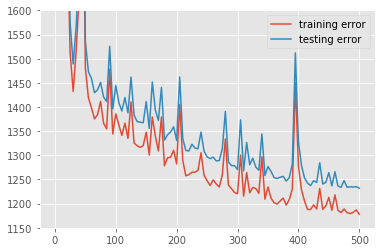

In [91]:
%matplotlib inline
ll_train_set = trainer.history["ll_train_set"]
ll_test_set = trainer.history["ll_test_set"]
x = np.linspace(0,500,(len(ll_train_set)))
plt.plot(x, ll_train_set,label="training error")
plt.plot(x, ll_test_set, label = "testing error")
plt.ylim(1150,1600)
plt.legend(loc = "upper right")
plt.show()

## Obtaining the posterior object and sample latent space from it

The posterior object contains a model and a gene_dataset, as well as additional arguments that for Pytorch's `DataLoader`. It also comes with many methods or utilities querying the model, such as differential expression, imputation and differential analyisis.


To get an ordered output result, we might use `.sequential` posterior's method which return another instance of posterior (with shallow copy of all its object references), but where the iteration is in the same ordered as its  indices attribute.



In [92]:
trainer.history["ll_trin_set"]

[]

In [93]:
full = trainer.create_posterior(trainer.model, cortex_dataset, indices=np.arange(len(cortex_dataset)))
latent, batch_indices, labels = full.sequential().get_latent()
batch_indices = batch_indices.ravel()

## Visualizing the latent space

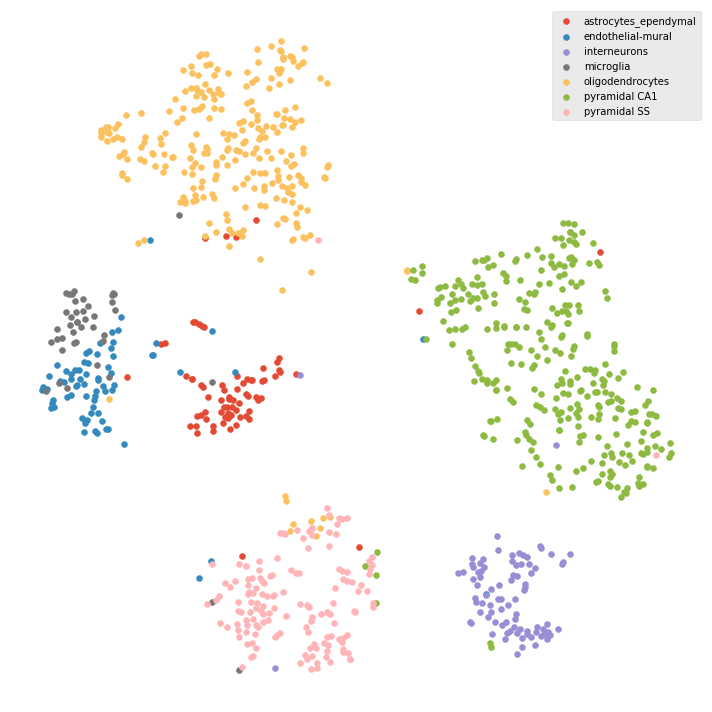

In [94]:
n_samples_tsne = 1000
full.show_t_sne(n_samples=n_samples_tsne, color_by='labels')